In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('./rlcard'))

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np

import rlcard
from rlcard.agents import CFRAgent, RandomAgent
from rlcard import models
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

In [4]:
# Make environment and enable human mode
env = rlcard.make('kuhn-poker', config={'seed': 0, 'allow_step_back':True})
eval_env = rlcard.make('kuhn-poker', config={'seed': 0})

In [5]:
# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 1000  # evaluate every 100 episodes
evaluate_num = 10000  # number of evaluation episodes/runs/hands
episode_num = 100000   # number of training episodes (hands?)

# The paths for saving the logs and learning curves
log_dir = './experiments/kuhn_poker_cfr_result/'

# Set a global seed
set_global_seed(0)

# Initilize CFR Agent
agent = CFRAgent(env, model_path='./models/kuhn_poker_cfr')
agent.load()  # If we have saved model, we first load the model

# Evaluate CFR against random agent
eval_env.set_agents([agent, RandomAgent(action_num=eval_env.action_num)])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

In [6]:
for episode in range(episode_num):
    agent.train()
    print('\rIteration {}'.format(episode), end='')
    # Evaluate the performance. Play with random agents.
    if episode % evaluate_every == 0:
        agent.save() # Save model
        # return of tournament is average payoff for each
        # env.timestep counts each step/action
        logger.log_performance(episode, tournament(eval_env, evaluate_num)[0])

Iteration 0
----------------------------------------
  timestep     |  0
  reward       |  -0.0208
----------------------------------------
Iteration 1000
----------------------------------------
  timestep     |  1000
  reward       |  0.4565
----------------------------------------
Iteration 2000
----------------------------------------
  timestep     |  2000
  reward       |  0.408
----------------------------------------
Iteration 3000
----------------------------------------
  timestep     |  3000
  reward       |  0.3931
----------------------------------------
Iteration 4000
----------------------------------------
  timestep     |  4000
  reward       |  0.4341
----------------------------------------
Iteration 5000
----------------------------------------
  timestep     |  5000
  reward       |  0.4436
----------------------------------------
Iteration 6000
----------------------------------------
  timestep     |  6000
  reward       |  0.4105
--------------------------------

Iteration 56000
----------------------------------------
  timestep     |  56000
  reward       |  0.424
----------------------------------------
Iteration 57000
----------------------------------------
  timestep     |  57000
  reward       |  0.4249
----------------------------------------
Iteration 58000
----------------------------------------
  timestep     |  58000
  reward       |  0.4127
----------------------------------------
Iteration 59000
----------------------------------------
  timestep     |  59000
  reward       |  0.4169
----------------------------------------
Iteration 60000
----------------------------------------
  timestep     |  60000
  reward       |  0.4073
----------------------------------------
Iteration 61000
----------------------------------------
  timestep     |  61000
  reward       |  0.4103
----------------------------------------
Iteration 62000
----------------------------------------
  timestep     |  62000
  reward       |  0.4139
-------------

./experiments/kuhn_poker_cfr_result/performance.csv


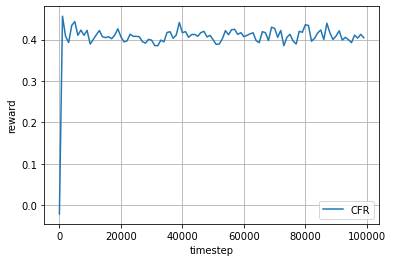

In [7]:
# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('CFR')

In [8]:
eval_env_cfr_cfr = rlcard.make('kuhn-poker', config={'seed': 1})
eval_env_cfr_cfr.set_agents([agent, agent])
payoffs = tournament(eval_env_cfr_cfr, 10000)
print(payoffs)

[0.0036, -0.0036]
